# Exercise Sheet 5
## Particle Mesh Methods

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [28]:
#function that takes the particle's location and returns it's grid indices
def find_indices(X,Y,H,K,method):
    # Calculate indices
    k = (int)(round(np.abs(X+H)*(K/(2*H))-0.5,0))
    l = (int)(round(np.abs(Y+H)*(K/(2*H))-0.5,0))
    h = 2*H/K
    
    # grid point centers:
    xgrid = np.linspace(-H+0.5,H-0.5,K)
    ygrid = np.linspace(-H+0.5,H-0.5,K)
    gridx,gridy = np.meshgrid(xgrid,ygrid)
    
    # create W-matrix
    W = np.ones((3,3))
    
    # for case of the zeroth order method
    if method == 0:
        W=np.zeros((3,3))
        W[1,1] = 1
        
        return k,l,W
    
    # case for a first order
    if method == 1:
        ex = (X-gridx[l,k]-0.5*h) / h *(-1)
        ey = (Y-gridy[l,k]-0.5*h) / h *(-1)
  
        if ex <0.5:
            W[:,0]*=0.5-ex
            W[:,1]*=0.5+ex
            W[:,2]*=0
            
        else:
            W[:,0]*=0
            W[:,1]*=1.5-ex
            W[:,2]*=ex-0.5
            
        if ey <0.5:
            W[0,:]*=0.5-ey
            W[1,:]*=0.5+ey
            W[2,:]*=0

        else:
            W[0,:]*=0
            W[1,:]*=1.5-ey
            W[2,:]*=ey-0.5
        
        return k,l,W
    
    # for case of the first formed particle
    if method == 2:
        ex = (X-gridx[l,k]-0.5*h) / h *(-1)
        ey = (Y-gridy[l,k]-0.5*h) / h *(-1)
        
        W [: ,0]*=0.5 - ex +0.5* ex **2
        W [: ,1]*=0.5+ ex -ex **2
        W [: ,2]*=0.5* ex **2
        W [0 ,:]*=0.5 - ey +0.5* ey **2
        W [1 ,:]*=0.5+ ey -ey **2
        W [2 ,:]*=0.5* ey **2
        
        return k,l,W
    
    
    else:
        print('Method must be: 0 (delta), 1 (box), 2 (triangular)')

def density(x,y,H,K,method):
    density=np.zeros((K, K))
    for i in np.arange(0,len(x)):
        k,l,W=find_indices(x[i],y[i],H,K,method)
        density[l+1,k+1]+=W[0,0]
        density[l+1,k  ]+=W[0,1]
        density[l+1,k-1]+=W[0,2]
        density[l  ,k+1]+=W[1,0]
        density[l  ,k  ]+=W[1,1]
        density[l  ,k-1]+=W[1,2]
        density[l-1,k+1]+=W[2,0]
        density[l-1,k  ]+=W[2,1]
        density[l-1,k-1]+=W[2,2]
    return (2*H/K)**(-2)*density

# sum up mass of gridcells
def mass_from_density(dens,h):
    M=np.sum(h**2 * dens)
    for i in np.arange(0,np.shape(dens)[0]):
        for j in np.arange(0,np.shape(dens)[1]):
            M+=h**2 * dens[i,j]
    return M

0th order integrated mass = 2.0
1st order integrated mass = 2.0
2nd order integrated mass = 1.9999999999999998


C:\Users\THINK\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5823: RuntimeWarning: invalid value encountered in log
  self._logdelta = np.log(self._delta)


Text(0.5,1,'Second Order')

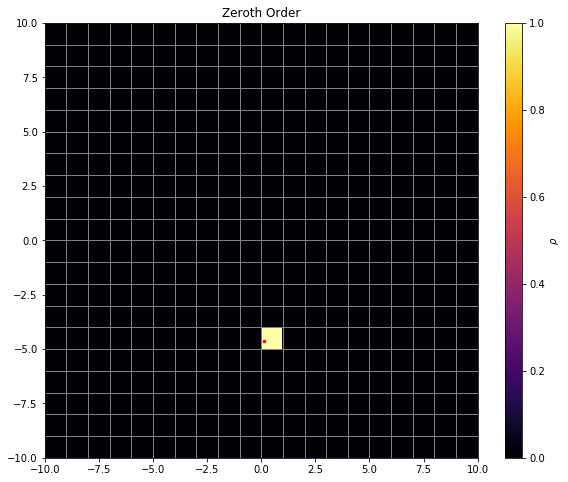

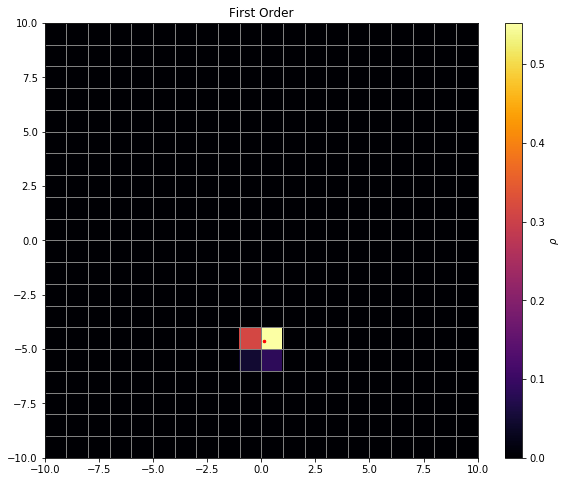

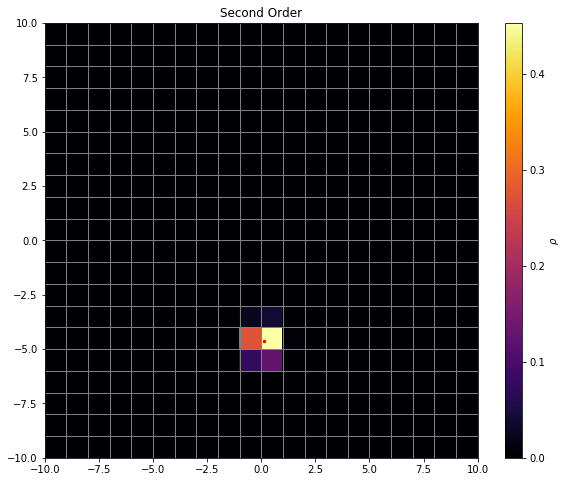

In [29]:
################################################################################
#                            Example Problem                                   #
################################################################################

H=10.0
K=20
# gridcell size
h=2*H/K

#gridpoints (actually not used here)
xgrid = np.linspace(-H+0.5,H-0.5,K)
ygrid = np.linspace(-H+0.5,H-0.5,K)
gridx,gridy = np.meshgrid(xgrid,ygrid)

#gridlines
xgrid_ = np.linspace(-H,H,K+1)
ygrid_ = np.linspace(-H,H,K+1)
gridx_,gridy_ = np.meshgrid(xgrid_,ygrid_)

lower = H-2*H/K
upper = -H+(2*H/K)
mu = 0
sigma = 3
N = 1

x = scipy.stats.truncnorm.rvs(
          (lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=N)
y = scipy.stats.truncnorm.rvs(
          (lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=N)

dens=density(x,y,H,K,0)
print('0th order integrated mass = '+str(mass_from_density(dens,h)))
plt.figure(figsize=(9.7,8))
plt.plot(x,y,'.', color='r',markersize=5)
plt.pcolormesh(gridx_,gridy_,dens,vmin=0,cmap=plt.get_cmap('inferno'))
plt.colorbar(orientation='vertical', aspect=25,label=r'$\rho$')
plt.hlines(gridy_,xmin=-H,xmax=H,color='grey',linewidth=1)
plt.vlines(gridx_,ymin=-H,ymax=H,color='grey',linewidth=1)
plt.axis('equal')
plt.title('Zeroth Order')

dens=density(x,y,H,K,1)
print('1st order integrated mass = '+str(mass_from_density(dens,h)))
plt.figure(figsize=(9.7,8))
plt.plot(x,y,'.', color='r',markersize=5)
plt.pcolormesh(gridx_,gridy_,dens,vmin=0,cmap=plt.get_cmap('inferno'))
plt.colorbar(orientation='vertical', aspect=25,label=r'$\rho$')
plt.hlines(gridy_,xmin=-H,xmax=H,color='grey',linewidth=1)
plt.vlines(gridx_,ymin=-H,ymax=H,color='grey',linewidth=1)
plt.axis('equal')
plt.title('First Order')

dens=density(x,y,H,K,2)
print('2nd order integrated mass = '+str(mass_from_density(dens,h)))
plt.figure(figsize=(9.7,8))
plt.plot(x,y,'.', color='r',markersize=5)
plt.pcolormesh(gridx_,gridy_,dens,vmin=0,cmap=plt.get_cmap('inferno'))
plt.colorbar(orientation='vertical', aspect=25,label=r'$\rho$')
plt.hlines(gridy_,xmin=-H,xmax=H,color='grey',linewidth=1)
plt.vlines(gridx_,ymin=-H,ymax=H,color='grey',linewidth=1)
plt.axis('equal')
plt.title('Second Order')

0th order integrated mass = 20.0
1st order integrated mass = 19.99999999999999
2nd order integrated mass = 20.000000000000007


C:\Users\THINK\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5823: RuntimeWarning: invalid value encountered in log
  self._logdelta = np.log(self._delta)


Text(0.5,1,'Second Order')

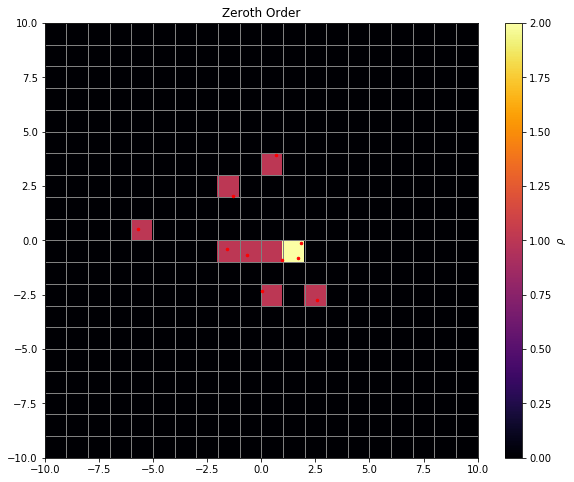

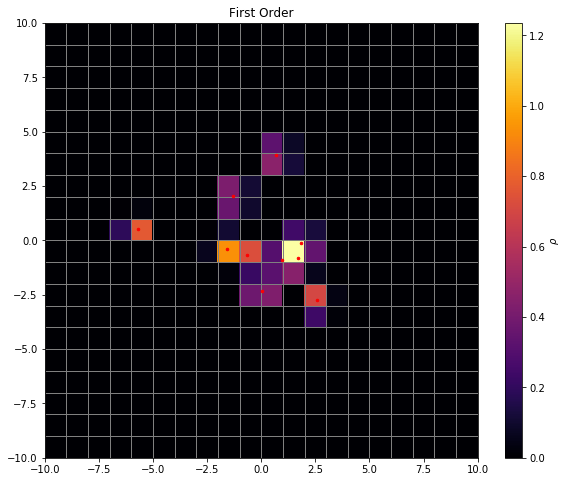

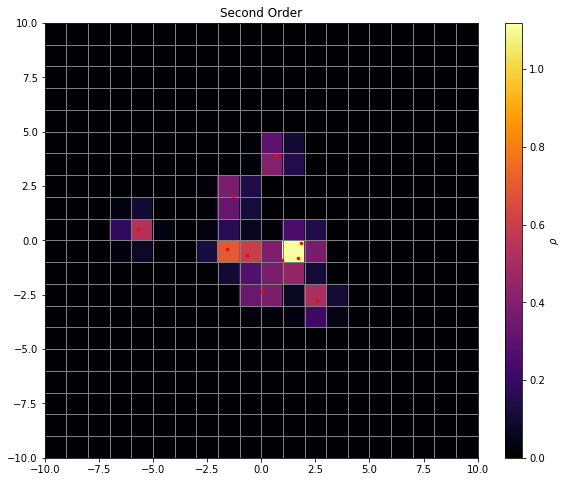

In [30]:
lower = H-2*H/K
upper = -H+(2*H/K)
mu = 0
sigma = 3
N = 10

x = scipy.stats.truncnorm.rvs(
          (lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=N)
y = scipy.stats.truncnorm.rvs(
          (lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=N)

dens=density(x,y,H,K,0)
print('0th order integrated mass = '+str(mass_from_density(dens,h)))
plt.figure(figsize=(9.7,8))
plt.plot(x,y,'.', color='r',markersize=5)
plt.pcolormesh(gridx_,gridy_,dens,vmin=0,cmap=plt.get_cmap('inferno'))
plt.colorbar(orientation='vertical', aspect=25,label=r'$\rho$')
plt.hlines(gridy_,xmin=-H,xmax=H,color='grey',linewidth=1)
plt.vlines(gridx_,ymin=-H,ymax=H,color='grey',linewidth=1)
plt.axis('equal')
plt.title('Zeroth Order')

dens=density(x,y,H,K,1)
print('1st order integrated mass = '+str(mass_from_density(dens,h)))
plt.figure(figsize=(9.7,8))
plt.plot(x,y,'.', color='r',markersize=5)
plt.pcolormesh(gridx_,gridy_,dens,vmin=0,cmap=plt.get_cmap('inferno'))
plt.colorbar(orientation='vertical', aspect=25,label=r'$\rho$')
plt.hlines(gridy_,xmin=-H,xmax=H,color='grey',linewidth=1)
plt.vlines(gridx_,ymin=-H,ymax=H,color='grey',linewidth=1)
plt.axis('equal')
plt.title('First Order')

dens=density(x,y,H,K,2)
print('2nd order integrated mass = '+str(mass_from_density(dens,h)))
plt.figure(figsize=(9.7,8))
plt.plot(x,y,'.', color='r',markersize=5)
plt.pcolormesh(gridx_,gridy_,dens,vmin=0,cmap=plt.get_cmap('inferno'))
plt.colorbar(orientation='vertical', aspect=25,label=r'$\rho$')
plt.hlines(gridy_,xmin=-H,xmax=H,color='grey',linewidth=1)
plt.vlines(gridx_,ymin=-H,ymax=H,color='grey',linewidth=1)
plt.axis('equal')
plt.title('Second Order')

0th order integrated mass = 200.0
1st order integrated mass = 199.99999999999997
2nd order integrated mass = 200.00000000000017


C:\Users\THINK\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5823: RuntimeWarning: invalid value encountered in log
  self._logdelta = np.log(self._delta)


Text(0.5,1,'Second Order')

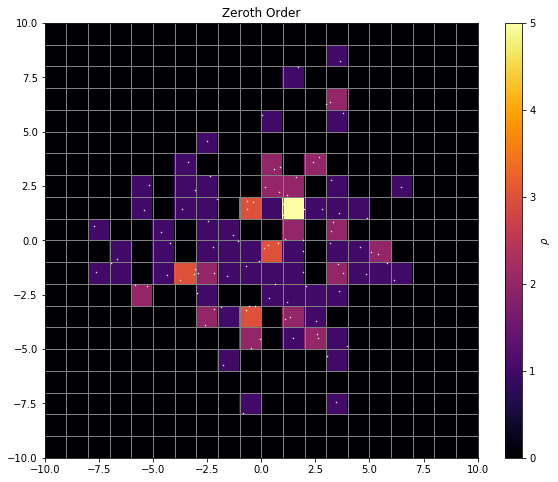

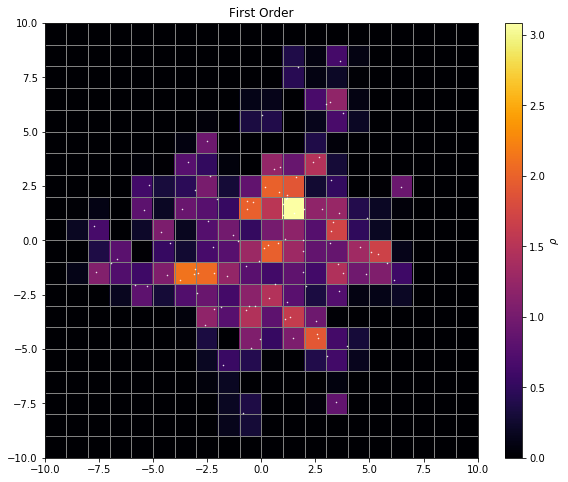

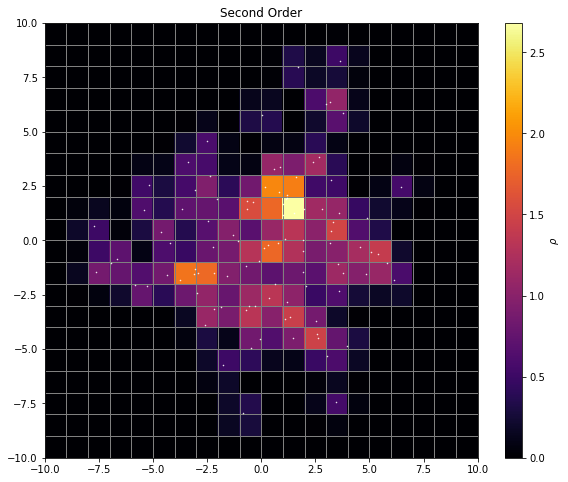

In [31]:
lower = H-2*H/K
upper = -H+(2*H/K)
mu = 0
sigma = 3
N = 100

x = scipy.stats.truncnorm.rvs(
          (lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=N)
y = scipy.stats.truncnorm.rvs(
          (lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=N)

dens=density(x,y,H,K,0)
print('0th order integrated mass = '+str(mass_from_density(dens,h)))
plt.figure(figsize=(9.7,8))
plt.plot(x,y,'.', color='w',markersize=1)
plt.pcolormesh(gridx_,gridy_,dens,vmin=0,cmap=plt.get_cmap('inferno'))
plt.colorbar(orientation='vertical', aspect=25,label=r'$\rho$')
plt.hlines(gridy_,xmin=-H,xmax=H,color='grey',linewidth=1)
plt.vlines(gridx_,ymin=-H,ymax=H,color='grey',linewidth=1)
plt.axis('equal')
plt.title('Zeroth Order')

dens=density(x,y,H,K,1)
print('1st order integrated mass = '+str(mass_from_density(dens,h)))
plt.figure(figsize=(9.7,8))
plt.plot(x,y,'.', color='w',markersize=1)
plt.pcolormesh(gridx_,gridy_,dens,vmin=0,cmap=plt.get_cmap('inferno'))
plt.colorbar(orientation='vertical', aspect=25,label=r'$\rho$')
plt.hlines(gridy_,xmin=-H,xmax=H,color='grey',linewidth=1)
plt.vlines(gridx_,ymin=-H,ymax=H,color='grey',linewidth=1)
plt.axis('equal')
plt.title('First Order')

dens=density(x,y,H,K,2)
print('2nd order integrated mass = '+str(mass_from_density(dens,h)))
plt.figure(figsize=(9.7,8))
plt.plot(x,y,'.', color='w',markersize=1)
plt.pcolormesh(gridx_,gridy_,dens,vmin=0,cmap=plt.get_cmap('inferno'))
plt.colorbar(orientation='vertical', aspect=25,label=r'$\rho$')
plt.hlines(gridy_,xmin=-H,xmax=H,color='grey',linewidth=1)
plt.vlines(gridx_,ymin=-H,ymax=H,color='grey',linewidth=1)
plt.axis('equal')
plt.title('Second Order')

C:\Users\THINK\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5823: RuntimeWarning: invalid value encountered in log
  self._logdelta = np.log(self._delta)


0th order integrated mass = 2000.0
1st order integrated mass = 1999.9999999999993
2nd order integrated mass = 1999.999999999999


Text(0.5,1,'Second Order')

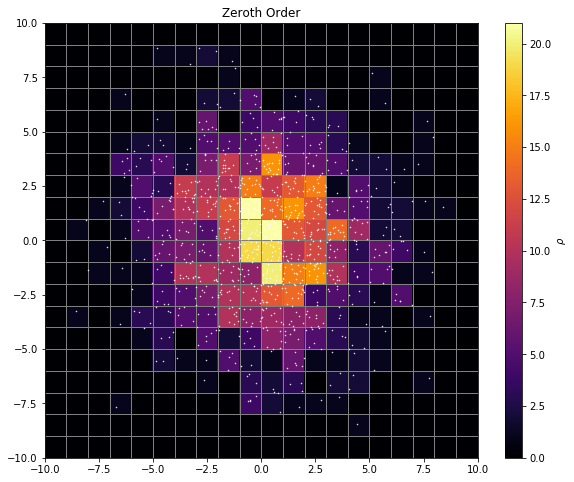

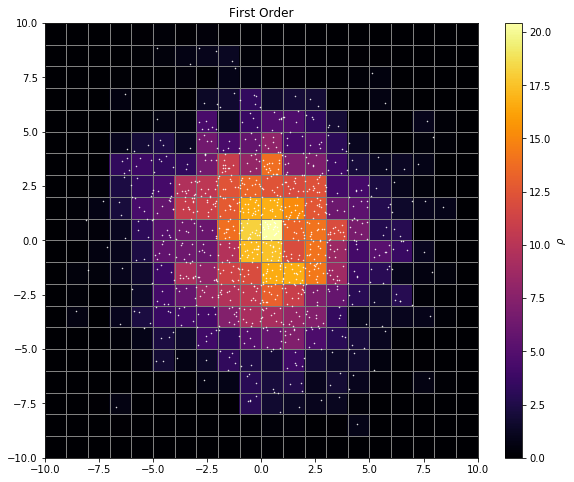

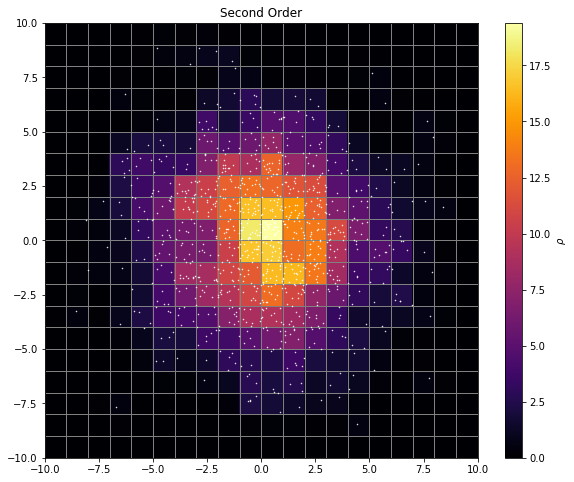

In [32]:
lower = H-2*H/K
upper = -H+(2*H/K)
mu = 0
sigma = 3
N = 1000

x = scipy.stats.truncnorm.rvs(
          (lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=N)
y = scipy.stats.truncnorm.rvs(
          (lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=N)

dens=density(x,y,H,K,0)
print('0th order integrated mass = '+str(mass_from_density(dens,h)))
plt.figure(figsize=(9.7,8))
plt.plot(x,y,'.', color='w',markersize=1)
plt.pcolormesh(gridx_,gridy_,dens,vmin=0,cmap=plt.get_cmap('inferno'))
plt.colorbar(orientation='vertical', aspect=25,label=r'$\rho$')
plt.hlines(gridy_,xmin=-H,xmax=H,color='grey',linewidth=1)
plt.vlines(gridx_,ymin=-H,ymax=H,color='grey',linewidth=1)
plt.axis('equal')
plt.title('Zeroth Order')

dens=density(x,y,H,K,1)
print('1st order integrated mass = '+str(mass_from_density(dens,h)))
plt.figure(figsize=(9.7,8))
plt.plot(x,y,'.', color='w',markersize=1)
plt.pcolormesh(gridx_,gridy_,dens,vmin=0,cmap=plt.get_cmap('inferno'))
plt.colorbar(orientation='vertical', aspect=25,label=r'$\rho$')
plt.hlines(gridy_,xmin=-H,xmax=H,color='grey',linewidth=1)
plt.vlines(gridx_,ymin=-H,ymax=H,color='grey',linewidth=1)
plt.axis('equal')
plt.title('First Order')

dens=density(x,y,H,K,2)
print('2nd order integrated mass = '+str(mass_from_density(dens,h)))
plt.figure(figsize=(9.7,8))
plt.plot(x,y,'.', color='w',markersize=1)
plt.pcolormesh(gridx_,gridy_,dens,vmin=0,cmap=plt.get_cmap('inferno'))
plt.colorbar(orientation='vertical', aspect=25,label=r'$\rho$')
plt.hlines(gridy_,xmin=-H,xmax=H,color='grey',linewidth=1)
plt.vlines(gridx_,ymin=-H,ymax=H,color='grey',linewidth=1)
plt.axis('equal')
plt.title('Second Order')

C:\Users\THINK\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5823: RuntimeWarning: invalid value encountered in log
  self._logdelta = np.log(self._delta)


0th order integrated mass = 20000.0
1st order integrated mass = 20000.0
2nd order integrated mass = 19999.99999999997


Text(0.5,1,'Second Order')

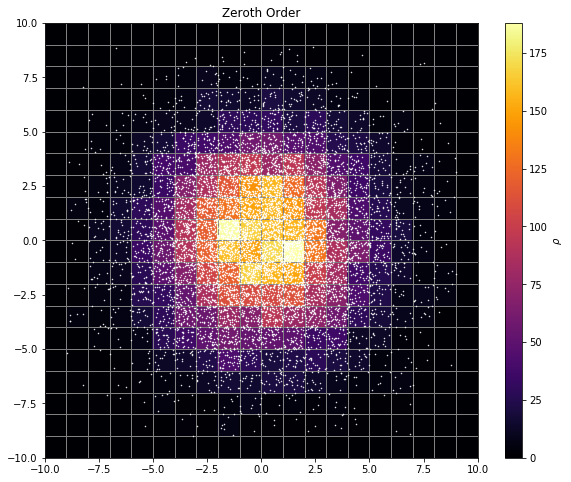

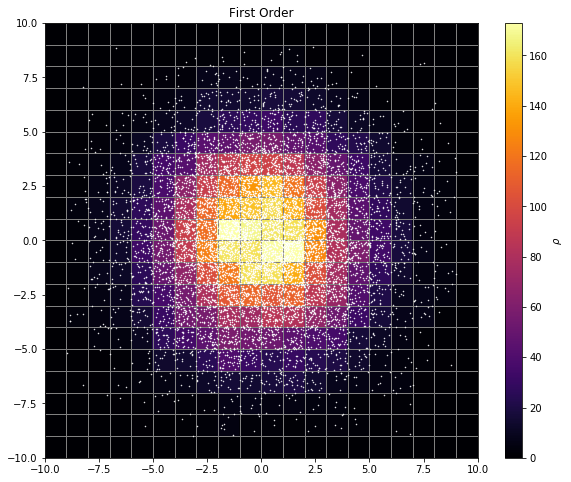

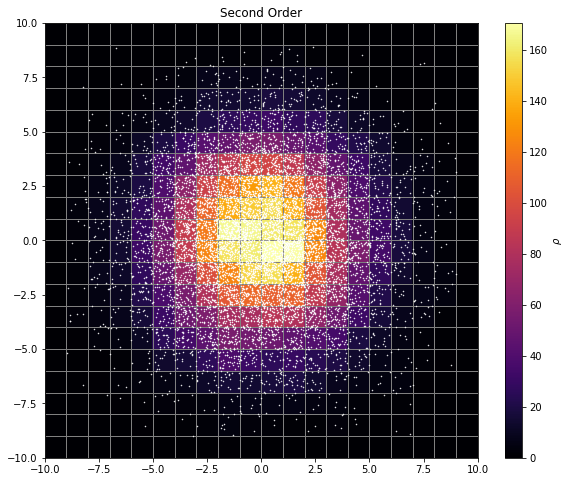

In [33]:
lower = H-2*H/K
upper = -H+(2*H/K)
mu = 0
sigma = 3
N = 10000

x = scipy.stats.truncnorm.rvs(
          (lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=N)
y = scipy.stats.truncnorm.rvs(
          (lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=N)

dens=density(x,y,H,K,0)
print('0th order integrated mass = '+str(mass_from_density(dens,h)))
plt.figure(figsize=(9.7,8))
plt.plot(x,y,'.', color='w',markersize=1)
plt.pcolormesh(gridx_,gridy_,dens,vmin=0,cmap=plt.get_cmap('inferno'))
plt.colorbar(orientation='vertical', aspect=25,label=r'$\rho$')
plt.hlines(gridy_,xmin=-H,xmax=H,color='grey',linewidth=1)
plt.vlines(gridx_,ymin=-H,ymax=H,color='grey',linewidth=1)
plt.axis('equal')
plt.title('Zeroth Order')

dens=density(x,y,H,K,1)
print('1st order integrated mass = '+str(mass_from_density(dens,h)))
plt.figure(figsize=(9.7,8))
plt.plot(x,y,'.', color='w',markersize=1)
plt.pcolormesh(gridx_,gridy_,dens,vmin=0,cmap=plt.get_cmap('inferno'))
plt.colorbar(orientation='vertical', aspect=25,label=r'$\rho$')
plt.hlines(gridy_,xmin=-H,xmax=H,color='grey',linewidth=1)
plt.vlines(gridx_,ymin=-H,ymax=H,color='grey',linewidth=1)
plt.axis('equal')
plt.title('First Order')

dens=density(x,y,H,K,2)
print('2nd order integrated mass = '+str(mass_from_density(dens,h)))
plt.figure(figsize=(9.7,8))
plt.plot(x,y,'.', color='w',markersize=1)
plt.pcolormesh(gridx_,gridy_,dens,vmin=0,cmap=plt.get_cmap('inferno'))
plt.colorbar(orientation='vertical', aspect=25,label=r'$\rho$')
plt.hlines(gridy_,xmin=-H,xmax=H,color='grey',linewidth=1)
plt.vlines(gridx_,ymin=-H,ymax=H,color='grey',linewidth=1)
plt.axis('equal')
plt.title('Second Order')